(1256,) (1256,)
59.38578 68.44992 14
58.30545 67.58452 14
57.296833 66.71345 14
56.352608 65.83695 14
55.464832 64.954636 13
54.63257 64.069626 13
53.845676 63.179577 13
52.744843 61.83865 13
52.05803 60.940674 13
51.40554 60.039917 12
50.783928 59.136497 12
50.190895 58.2307 12
49.624084 57.32274 12
49.08127 56.412704 12
48.5606 55.500847 12
48.060448 54.587128 12
47.579582 53.671936 11
47.115906 52.755157 11
46.6688 51.836967 11
46.236584 50.917465 11
45.818596 49.996506 11
45.41363 49.074593 11
45.02108 48.151577 11
44.639965 47.227497 11
44.269787 46.302326 11
43.909462 45.37623 10
43.55851 44.44935 10
43.2164 43.52144 10
42.882637 42.59291 10
42.556892 41.663704 10
42.238037 40.73346 10
41.926437 39.802742 10
41.620895 38.87114 10
41.322266 37.93921 10
41.028755 37.00663 10
40.740868 36.073265 10
40.458103 35.139618 10
40.180138 34.205452 10
39.906986 33.27055 9
39.638268 32.33527 9
39.373917 31.399532 9
39.112717 30.463503 9
38.855038 29.527187 9
38.60154 28.590113 9
38.35125 27.

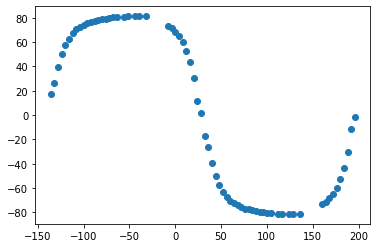

In [25]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import math
import datetime

PATH = '/home/users/dwest77/tbworkexp/01/'
data = os.listdir(PATH)

identifier = {}
for file in data:
    key= file[73:80]
    if key in identifier:
        pass
#this file type has already been saved into the dictionary
    else:
        identifier[key] = file

uniquely_identified_files = list(identifier.values())

def concat(data, var, dimension, moving=False):
    movement_index = [0, 0, 0, 25, 100, 125, 175]
    var_data = []
    iterations = 0
    file_path =  '/home/users/dwest77/tbworkexp/01/'
    for file in data:
        file_direction = file_path + file
        current_file_var_data = xr.open_mfdataset(file_direction)[var]
        if moving:
            current_file_var_data += movement_index[iterations]

        iterations += 1
        var_data.append(current_file_var_data)
        
        

    var_data = xr.concat(var_data, dim=dimension)
    return var_data

satzen_values = concat(uniquely_identified_files, 'satzen', 'npi')
long_values = concat(uniquely_identified_files, 'longitude', 'npi', True)
lat_values = concat(uniquely_identified_files, 'latitude', 'npi')
time_values = concat(uniquely_identified_files, 'sensingtime_day', 'npi')

lat_filter = lat_values[satzen_values < 1.5]
long_filter = long_values[satzen_values < 1.5]
time_filter = time_values[satzen_values < 1.5]

long_filter = np.array(long_filter)
lat_filter = np.array(lat_filter)
time_filter = np.array(time_filter)
print(long_filter.shape, lat_filter.shape)

long_filter = list(np.reshape(long_filter, (157, 8)))
lat_filter = list(np.reshape(lat_filter, (157, 8)))
time_filter = list(np.reshape(lat_filter, (157, 8)))

mean_of_time = []
mean_of_lat = []
mean_of_long = []
for group_of_data in lat_filter:
    mean_of_lat.append(np.mean(group_of_data, None))

for group_of_data in long_filter:
    mean_of_long.append(np.mean(group_of_data, None))

for group_of_data in time_filter:
    mean_of_time.append(np.mean(group_of_data, None))

test_to_variables = []
i = 36
while i <= 200:
    i += 4
    test_to_variables.append(i)
    lat_buckets = []


long_buckets = []
for x in range(0, 200, 4):
    long_buckets.append(x)

for x in range(0, len(long_buckets)):
    lat_buckets.append([])


for x in range(len(mean_of_lat)):
    current_latitudanal_value = mean_of_lat[x]
    current_longitudanal_value = mean_of_long[x]
    bucket_id = (current_longitudanal_value)/4
    bucket_id = math.floor(bucket_id)
    print(current_longitudanal_value, current_latitudanal_value, bucket_id)
    lat_buckets[bucket_id].append(current_latitudanal_value)


mean_of_lat_buckets = []
mean_of_long_buckets = []
for bid, bucket in enumerate(lat_buckets):
    total = 0
    for val in bucket:
        total += val
    if len(bucket) != 0:
        total = total / len(bucket)
        mean_of_lat_buckets.append(total)
        mean_of_long_buckets.append(long_buckets[bid])


second_array = []
for value in mean_of_lat_buckets:
    value = value * -1
    second_array.append(value)


full_lat_movement = second_array + mean_of_lat_buckets
temp_long_movement = mean_of_long_buckets + mean_of_long_buckets

full_long_movement = []
for value in temp_long_movement[34:]:
    value -= 168
    full_long_movement.append(value)

full_long_movement = mean_of_long_buckets + full_long_movement
print(full_long_movement)

plt.scatter(full_long_movement, full_lat_movement)

file_path =  '/home/users/dwest77/tbworkexp/01/'
chosen_var = 'sensingtime_msec'

def finding_var_diff(var, file_path, file_name):

    open_file = np.array(xr.open_mfdataset(file_path + file_name)[var])

    min_var = np.min(open_file)
    max_var  = np.max(open_file)
    min_avr = min_var / len(open_file)
    max_avr = max_var / len(open_file)
    return max_avr - min_avr


def finding_length_of_file(var, file_path, file_name):
    open_file = np.array(xr.open_mfdataset(file_path + file_name)[var])
    length = len(open_file)
    return length


list_of_time_avrs = []
list_of_lengths_files = []
for file in uniquely_identified_files:
    time_difference = finding_var_diff(chosen_var, file_path, file)
    length_of_file = finding_length_of_file(chosen_var, file_path, file)
    list_of_lengths_files.append(length_of_file)
    list_of_time_avrs.append(time_difference)

print(list_of_time_avrs)
print(list_of_lengths_files)

sum = 0
denom = 0
for i in range(len(list_of_time_avrs)):
    sum += list_of_lengths_files[i] * list_of_time_avrs[i]
    denom += list_of_lengths_files[i]


mean_dist_of_points = sum / denom
print(mean_dist_of_points)

n_points = 0
for val in list_of_lengths_files:
    n_points += val

total_time_msecs = (n_points) * mean_dist_of_points * 2
print(total_time_msecs)
total_time_secs = total_time_msecs *0.001
print(total_time_secs)

[-136, -132, -128, -124, -120, -116, -112, -108, -104, -100, -96, -92, -88, -84, -80, -76, -72, -68, -64, -56, -52, -44, -40, -32, -8, -4, 0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 112, 116, 124, 128, 136, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196] [-17.32132911682129, -26.242319226264954, -39.79808807373047, -49.992669423421226, -57.31864765712193, -62.9966323852539, -67.55452074323382, -70.65967305501302, -72.73310852050781, -74.3325080871582, -75.86193084716797, -76.95217895507812, -77.64075469970703, -78.2945556640625, -78.90641784667969, -79.4703140258789, -79.97740936279297, -80.41854858398438, -80.78475952148438, -81.06663513183594, -81.25647735595703, -81.34730529785156, -81.33673858642578, -81.2250747680664, -73.06367492675781, -71.41726430257161, -68.44729042053223, -64.95373725891113, -60.03673825945173, -52.836035988547586, -43.423086166381836, -30.143909613291424, -11.863453110059103, -1.97649196783701

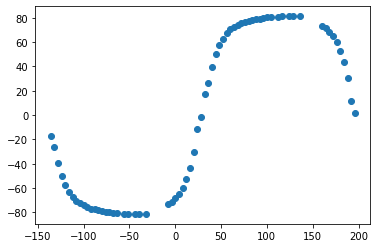

In [76]:
# Although this is useful, the graph above is half an orbit (we need to know how much a full orbit is
# Initial thought: Use days 02-03 to see if they have negatie latitudes, they do not >:(
# Next though, reflect and translate day 01 so that there is a full orbit.
# Below code should do this fine.

second_array = []
for value in mean_of_lat_buckets:
    value = value * -1
    second_array.append(value)

full_lat_movement = second_array +  mean_of_lat_buckets


temp_long_movement = mean_of_long_buckets + mean_of_long_buckets
full_long_movement = []
half_of_list = len(temp_long_movement) // 2
for value in temp_long_movement[half_of_list:]:
    value -= 168 ## rough translation estimate
    full_long_movement.append(value)

full_long_movement = full_long_movement + mean_of_long_buckets 
print(full_long_movement, full_lat_movement)

plt.scatter(full_long_movement, full_lat_movement)
json_file_coords = np.reshape(np.transpose([full_long_movement, full_lat_movement]), (len(full_lat_movement), 2))
print(json_file_coords.tolist())

In [82]:
def time_crunch(chosen_t, t_0, orbit_time):
    delta_t = (chosen_t - t_0).total_seconds()
    delta_l =  4 *  math.floor(delta_t / orbit_time)
    return delta_l

year = int(input('please enter the year value'))
month = int(input('please enter the month value'))
day = int(input('please enter the day value'))
user_time = datetime.datetime(year, month, day)
start_t = datetime.datetime(2004, 9, 30, 14,  23, 28)
one_orbit_time = 4911.887999999987

change_in_long = time_crunch(user_time, start_t, one_orbit_time)

rem_shift = change_in_long % 360
if rem_shift >= 180:
    rem_shift = rem_shift - 360
print(rem_shift)


please enter the year value 2007
please enter the month value 7
please enter the day value 30


-84


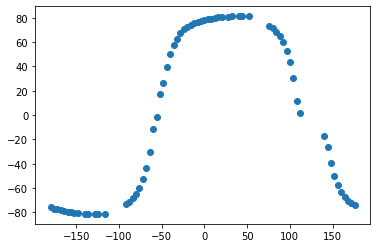

In [83]:
#rem_shift = -rem_shift
new_long_array = []
for num in full_long_movement:
    num += rem_shift
    new_long_array.append(num)

for x in range(len(new_long_array)):
    if new_long_array[x] >180:
        new_long_array[x] -= 360
    elif new_long_array[x] < -180:
        new_long_array[x] += 360
    else:
        pass

    
plt.scatter(new_long_array, full_lat_movement)